## Sobre o desafio

De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [ ]:
# Bibiotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
# Criando dicionário
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [6]:
# Validando criação do dicionário
dados_vendas

{'mes': ['Janeiro',
  'Fevereiro',
  'Março',
  'Abril',
  'Maio',
  'Junho',
  'Julho',
  'Agosto',
  'Setembro',
  'Outubro',
  'Novembro',
  'Dezembro'],
 'vendas': [2000,
  2200,
  2300,
  2500,
  2600,
  2700,
  2800,
  2900,
  3000,
  3100,
  3200,
  3300]}

In [7]:
# Criando Dataframe com base no dicionário criado
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [10]:
# Validando criação do Dataframe
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [11]:
# Validando informações do contéudo do Dataframe
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [12]:
# Validar se não há valores nulos no DataFrame
df_vendas.isnull().sum()

mes       0
vendas    0
dtype: int64

In [ ]:
# Precisamos adicionar uma coluna (feature) no Dataframe, para representar os meses em número e não mais com o seu nome com string

# Criando um dicionário com o mapeamento para os meses
meses_map = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4,
    'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8,
    'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

In [16]:
# Criando a nova feature 'mes_numero' no DataFrame
df_vendas['mes_numero'] = df_vendas['mes'].replace(meses_map)

C:\Users\Will\AppData\Local\Temp\ipykernel_15880\2560735398.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vendas['mes_numero'] = df_vendas['mes'].replace(meses_map)


In [17]:
# Validando o DataFrame atualizado
df_vendas

,mes,vendas,mes_numero
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [53]:
# Criando modelo
X = df_vendas[['mes_numero']] 
y = df_vendas['vendas'] 

In [54]:
# Dividir conjunto entre treino (0.7) e teste (0.3)
# com o random_state informado, o modelo sempre ira treinar e testar com os mesmos dados (reprodutibilidade)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [55]:
# Treinar modelo de regressão linear
model = LinearRegression().fit(X_train, y_train)

In [56]:
# Gerar predições do conjunto de testes com base no modelo
y_pred = model.predict(X_test)

In [57]:
# Validando predição geral
y_pred

array([2420.        , 2876.66666667, 2305.83333333, 2762.5       ])

In [58]:
# R2 Score modelo 1 - Conjunto de treinamento -> quanto X explica Y, quanto mais próximo de 1, melhor o modelo 
model.score(X_train, y_train)

0.990709949854843

In [59]:
# R2 Score - Testes
r2_score(y_test, y_pred)

0.9631440781440782

In [60]:
# MAE (Mean Absolute Error)
# A diferença média entre o "y_test" e "y_pred", por exemplo
mean_absolute_error(y_test, y_pred)

36.66666666666663

In [61]:
# Previsão das vendas para o mês selecionado (mes_numero = 12)
previsao_dezembro = model.predict([[12]])
print(f'previsão vendas dezembro: ', previsao_dezembro)

previsão vendas dezembro:  [3333.33333333]


c:\Users\Will\.virtualenvs\ia-challenge-meu-primeiro-modelo-scikit-le-oxk63SWM\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


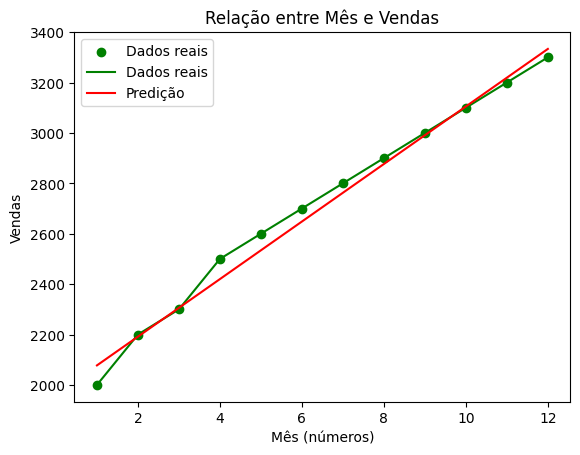

In [74]:
# Plot Scatter de todo o Dataframe + predição
plt.scatter(X, y, color='green', label='Dados reais')
plt.plot(X, y, color='green', label='Dados reais')
plt.plot(X, model.predict(X), color='red', label='Predição')
plt.xlabel('Mês (números)')
plt.ylabel('Vendas')
plt.title('Relação entre Mês e Vendas')
plt.legend()
plt.show()

array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'mes_numero'}>]], dtype=object)

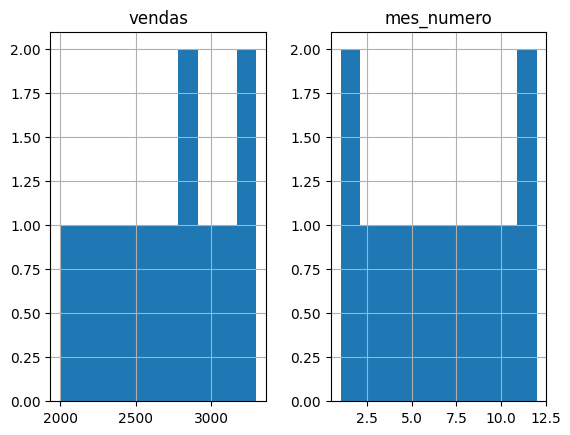

In [27]:
# Plot Histograma
df_vendas.hist()